ZARWAN ZAHID FA23-BCS-172 (LEADER)
MALIK KAYNAT TABUSSUM FA23-BCS-081
HASSAN SARDAR FA23-BCS-205

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [4]:
df = pd.read_csv("bike_buyers.csv")
df.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes


In [5]:
print("Shape of dataset:", df.shape)

Shape of dataset: (1000, 13)


In [6]:
print("Column Names:", df.columns.tolist()) # Converts index object into a regular python list
print("\n Data Types: \n", df.dtypes)
print("\n Missing Values: \n", df.isnull().sum())

Column Names: ['ID', 'Marital Status', 'Gender', 'Income', 'Children', 'Education', 'Occupation', 'Home Owner', 'Cars', 'Commute Distance', 'Region', 'Age', 'Purchased Bike']

 Data Types: 
 ID                    int64
Marital Status       object
Gender               object
Income              float64
Children            float64
Education            object
Occupation           object
Home Owner           object
Cars                float64
Commute Distance     object
Region               object
Age                 float64
Purchased Bike       object
dtype: object

 Missing Values: 
 ID                   0
Marital Status       7
Gender              11
Income               6
Children             8
Education            0
Occupation           0
Home Owner           4
Cars                 9
Commute Distance     0
Region               0
Age                  8
Purchased Bike       0
dtype: int64


In [7]:
# Example handling missing values
df = df.dropna(subset=['Income'])
df['Children'].fillna(df['Children'].median(), inplace=True)
df['Cars'].fillna(df['Cars'].median(), inplace=True)

# Recheck missing values
df.isnull().sum()

C:\Users\Zarwan\AppData\Local\Temp\ipykernel_8428\2603652371.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Children'].fillna(df['Children'].median(), inplace=True)
C:\Users\Zarwan\AppData\Local\Temp\ipykernel_8428\2603652371.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

ID                   0
Marital Status       6
Gender              11
Income               0
Children             0
Education            0
Occupation           0
Home Owner           4
Cars                 0
Commute Distance     0
Region               0
Age                  7
Purchased Bike       0
dtype: int64

In [8]:
# Checking duplicates
print("Duplicate Rows:", df.duplicated().sum())

Duplicate Rows: 0


In [9]:
# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print(df.columns)

Index(['id', 'marital_status', 'gender', 'income', 'children', 'education',
       'occupation', 'home_owner', 'cars', 'commute_distance', 'region', 'age',
       'purchased_bike'],
      dtype='object')


In [10]:
# Convert text columns to title case and strip spaces
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = df[col].str.strip().str.title()

# Fix gender inconsistency
df['gender'] = df['gender'].replace({'M': 'Male', 'F': 'Female'})

In [11]:
# Drop ID column
df.drop(columns=['id'], inplace=True)

In [12]:
df.head()

,marital_status,gender,income,children,education,occupation,home_owner,cars,commute_distance,region,age,purchased_bike
0,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes


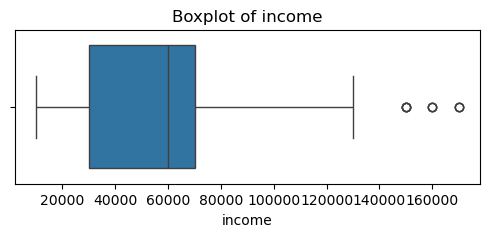

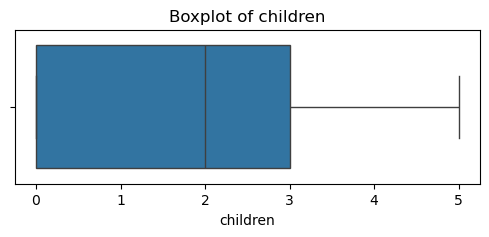

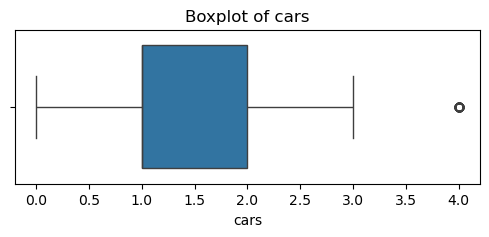

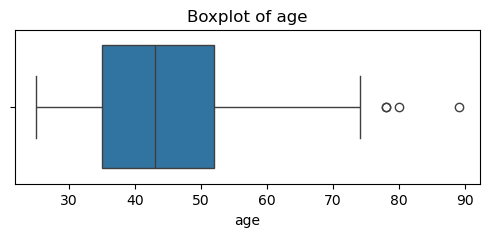

In [13]:
numeric_cols = df.select_dtypes(include=np.number).columns

# Visualize boxplots for numeric columns
for col in numeric_cols:
    plt.figure(figsize=(6, 2))
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.show()

In [14]:
# Remove outliers using IQR method
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

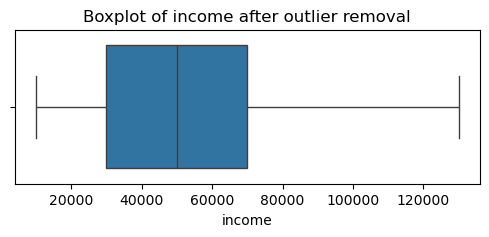

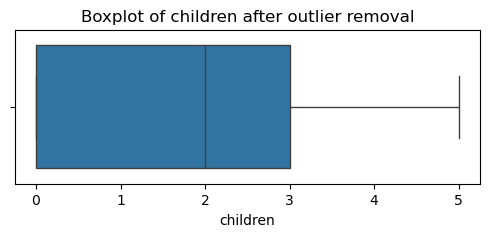

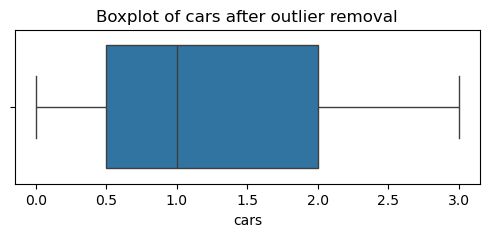

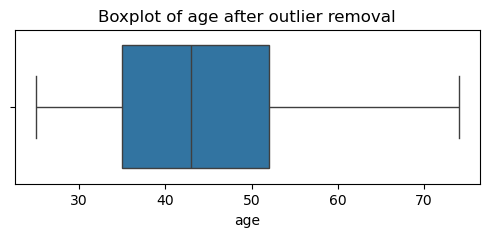

In [15]:
for col in numeric_cols:
    plt.figure(figsize=(6, 2))
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col} after outlier removal')
    plt.show()

In [16]:
df.head()

,marital_status,gender,income,children,education,occupation,home_owner,cars,commute_distance,region,age,purchased_bike
0,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes


In [17]:
print("Shape after cleaning:", df.shape)
print("\n Data Types: \n", df.dtypes)
print("\n Missing Values: \n", df.isnull().sum())
print("\n Unique Value Counts: \n", df.nunique())

Shape after cleaning: (919, 12)

 Data Types: 
 marital_status       object
gender               object
income              float64
children            float64
education            object
occupation           object
home_owner           object
cars                float64
commute_distance     object
region               object
age                 float64
purchased_bike       object
dtype: object

 Missing Values: 
 marital_status       4
gender              10
income               0
children             0
education            0
occupation           0
home_owner           3
cars                 0
commute_distance     0
region               0
age                  0
purchased_bike       0
dtype: int64

 Unique Value Counts: 
 marital_status       2
gender               2
income              13
children             6
education            5
occupation           5
home_owner           2
cars                 4
commute_distance     5
region               3
age                 50
purchased_bike 

In [18]:
# Fill categorical columns with mode (most frequent value)
categorical_cols = ['marital_status', 'gender', 'home_owner']
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\Zarwan\AppData\Local\Temp\ipykernel_8428\1580768992.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [19]:
print("Missing values: \n", df.isnull().sum())

Missing values: 
 marital_status      0
gender              0
income              0
children            0
education           0
occupation          0
home_owner          0
cars                0
commute_distance    0
region              0
age                 0
purchased_bike      0
dtype: int64


EDA

In [20]:
print("=== Central Tendency & Spread ===")
for col in numeric_cols:
    print(f"\nColumn: {col}")
    print(f"Mean: {df[col].mean():.2f}")
    print(f"Median: {df[col].median():.2f}")
    print(f"Mode: {df[col].mode()[0]}")
    print(f"Range: {df[col].max() - df[col].min():.2f}")
    print(f"Variance: {df[col].var():.2f}")
    print(f"Std Dev: {df[col].std():.2f}")
    print(f"Skewness: {df[col].skew():.2f}")


=== Central Tendency & Spread ===

Column: income
Mean: 52295.97
Median: 50000.00
Mode: 60000.0
Range: 120000.00
Variance: 736226029.52
Std Dev: 27133.49
Skewness: 0.53

Column: children
Mean: 1.87
Median: 2.00
Mode: 0.0
Range: 5.00
Variance: 2.58
Std Dev: 1.61
Skewness: 0.42

Column: cars
Mean: 1.29
Median: 1.00
Mode: 2.0
Range: 3.00
Variance: 0.88
Std Dev: 0.94
Skewness: 0.02

Column: age
Mean: 43.97
Median: 43.00
Mode: 47.0
Range: 49.00
Variance: 126.86
Std Dev: 11.26
Skewness: 0.45


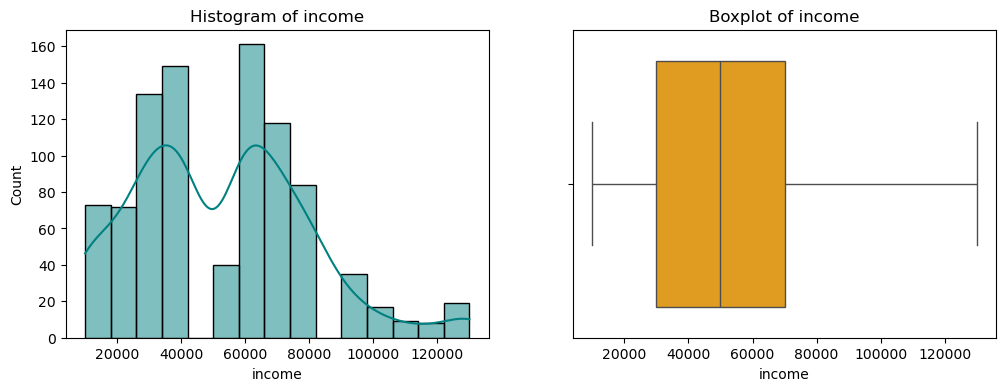

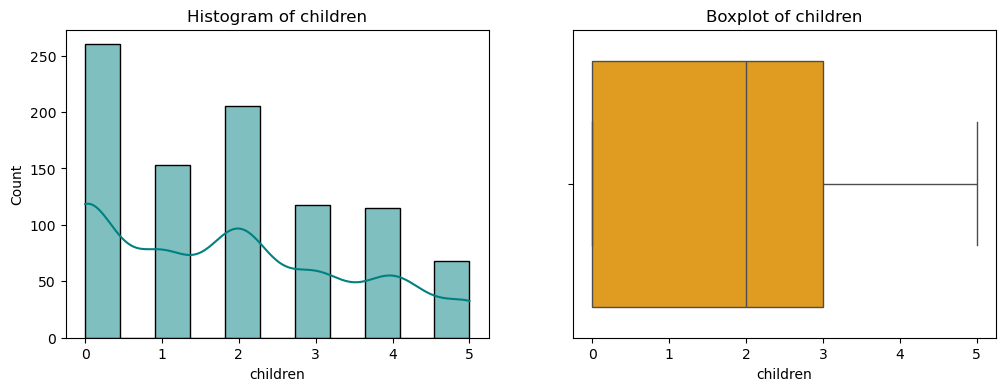

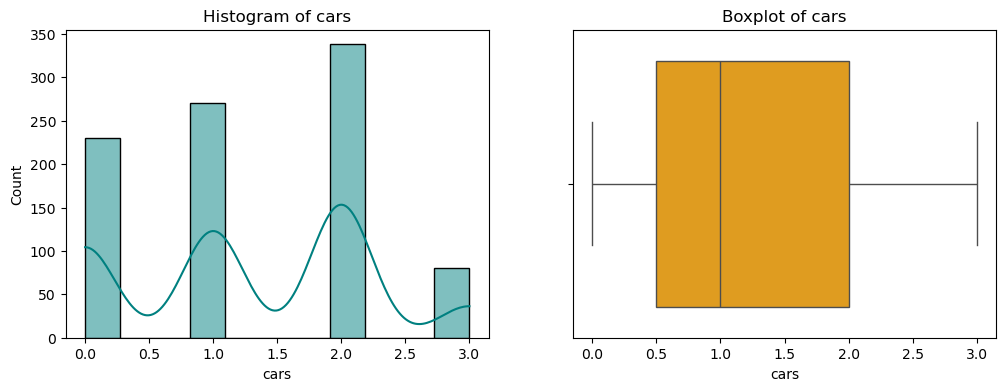

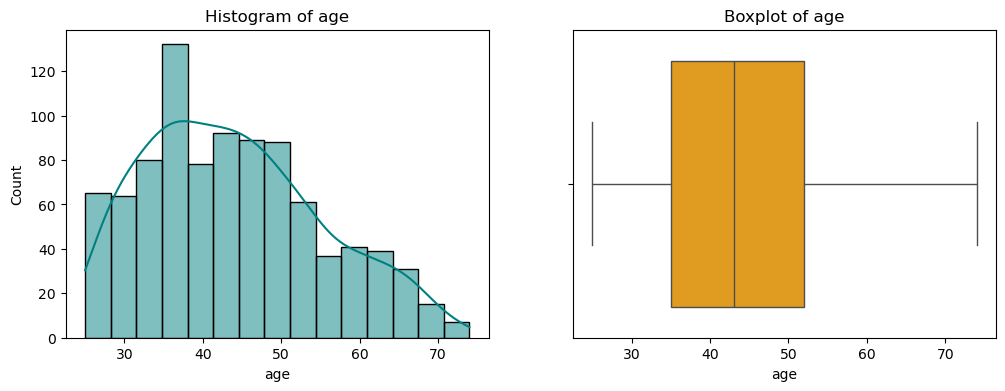

In [21]:
# Histograms and boxplots of numerical columns
for col in numeric_cols:
    plt.figure(figsize=(12,4))

    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True, color='teal')
    plt.title(f'Histogram of {col}')

    plt.subplot(1,2,2)
    sns.boxplot(x=df[col], color='orange')
    plt.title(f'Boxplot of {col}')

    plt.show()

=== Correlation Matrix ===


,income,children,cars,age
income,1.000000,0.266212,0.251105,0.180116
children,0.266212,1.000000,0.283333,0.546885
cars,0.251105,0.283333,1.000000,0.230867
age,0.180116,0.546885,0.230867,1.000000


=== Covariance Matrix ===


,income,children,cars,age
income,7.362260e+08,11598.924662,6399.432461,55044.853149
children,1.159892e+04,2.578506,0.427327,9.890979
cars,6.399432e+03,0.427327,0.882185,2.442310
age,5.504485e+04,9.890979,2.442310,126.858338


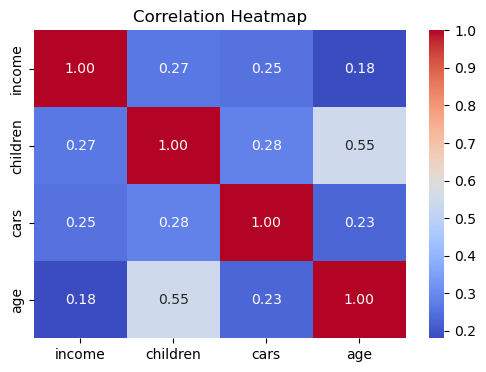

In [22]:
corr = df[numeric_cols].corr()
cov = df[numeric_cols].cov()

print("=== Correlation Matrix ===")
display(corr)

print("=== Covariance Matrix ===")
display(cov)

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


marital_status Mode: Married


C:\Users\Zarwan\AppData\Local\Temp\ipykernel_8428\899281190.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')


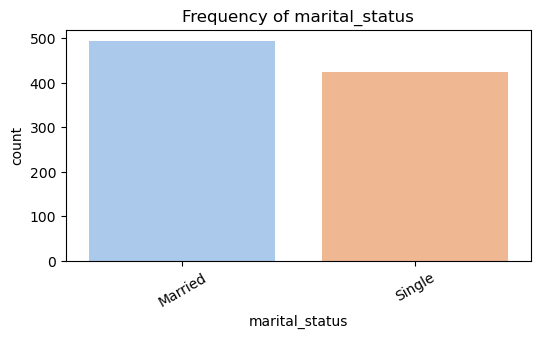


gender Mode: Male


C:\Users\Zarwan\AppData\Local\Temp\ipykernel_8428\899281190.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')


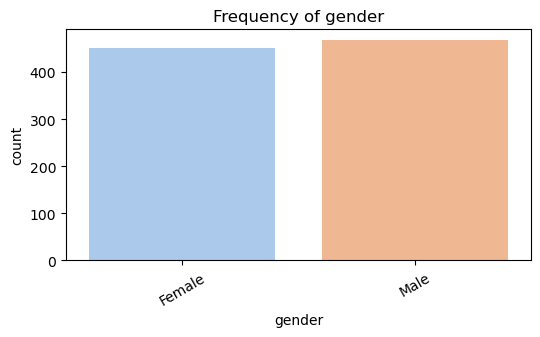


education Mode: Bachelors


C:\Users\Zarwan\AppData\Local\Temp\ipykernel_8428\899281190.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')


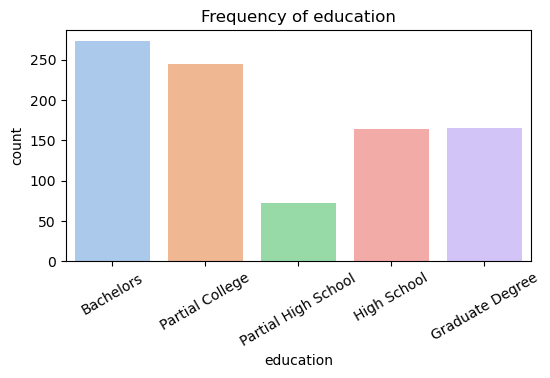


occupation Mode: Skilled Manual


C:\Users\Zarwan\AppData\Local\Temp\ipykernel_8428\899281190.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')


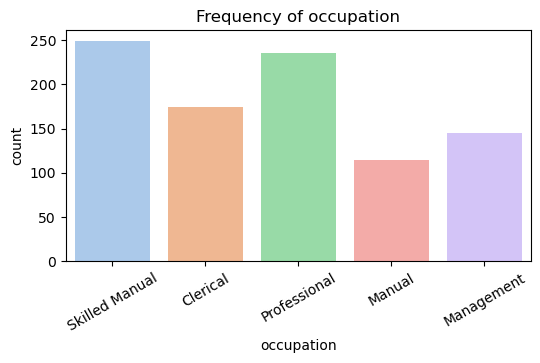


home_owner Mode: Yes


C:\Users\Zarwan\AppData\Local\Temp\ipykernel_8428\899281190.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')


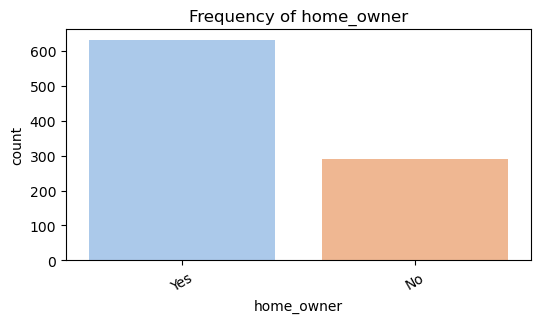


commute_distance Mode: 0-1 Miles


C:\Users\Zarwan\AppData\Local\Temp\ipykernel_8428\899281190.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')


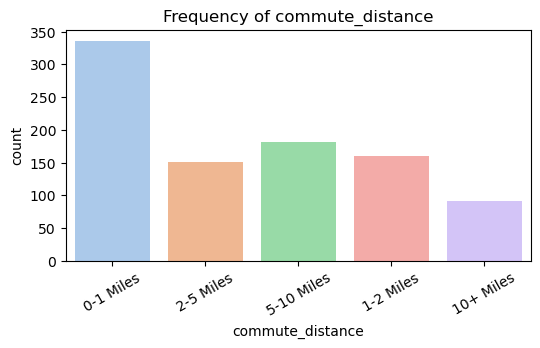

C:\Users\Zarwan\AppData\Local\Temp\ipykernel_8428\899281190.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')



region Mode: North America


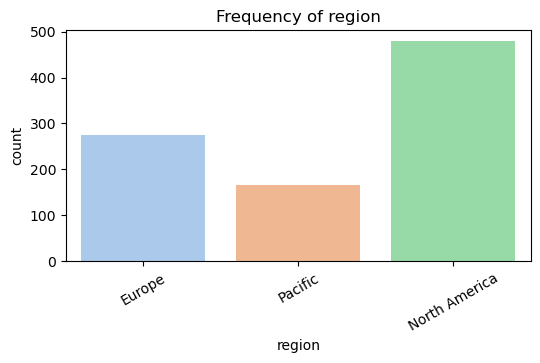


purchased_bike Mode: No


C:\Users\Zarwan\AppData\Local\Temp\ipykernel_8428\899281190.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')


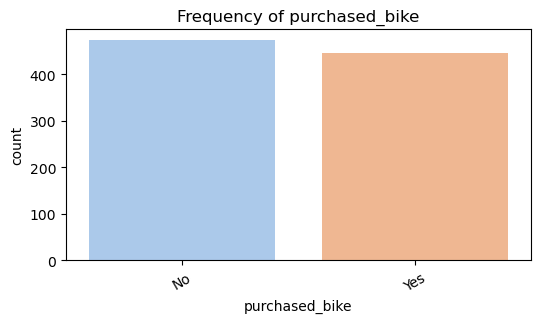

In [23]:
categorical_cols = ['marital_status', 'gender', 'education', 'occupation',
                    'home_owner', 'commute_distance', 'region', 'purchased_bike']

for col in categorical_cols:
    print(f"\n{col} Mode: {df[col].mode()[0]}")
    plt.figure(figsize=(6,3))
    sns.countplot(data=df, x=col, palette='pastel')
    plt.title(f'Frequency of {col}')
    plt.xticks(rotation=30)
    plt.show()

C:\Users\Zarwan\AppData\Local\Temp\ipykernel_8428\247308973.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='purchased_bike', y=col, palette='Set2')


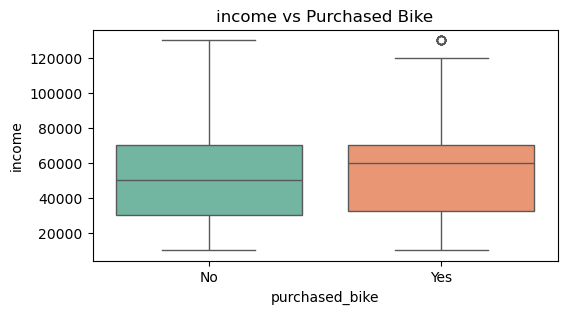

C:\Users\Zarwan\AppData\Local\Temp\ipykernel_8428\247308973.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='purchased_bike', y=col, palette='Set2')


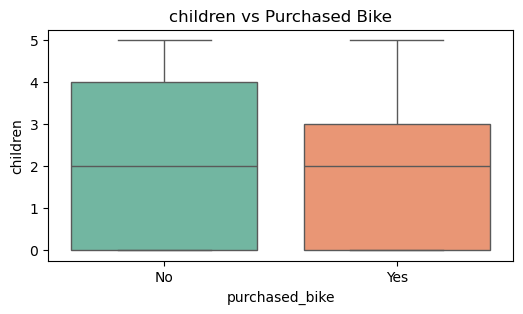

C:\Users\Zarwan\AppData\Local\Temp\ipykernel_8428\247308973.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='purchased_bike', y=col, palette='Set2')


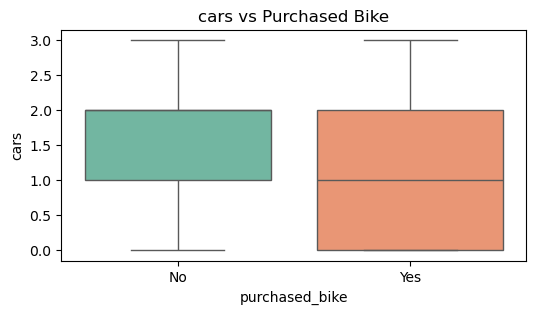

C:\Users\Zarwan\AppData\Local\Temp\ipykernel_8428\247308973.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='purchased_bike', y=col, palette='Set2')


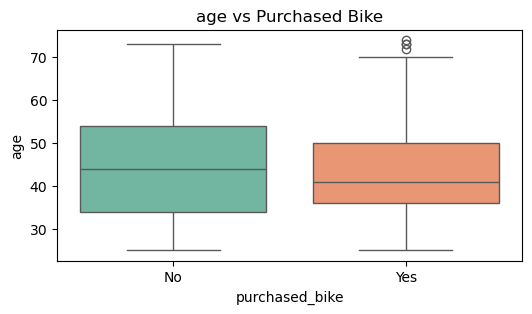

In [24]:
# Anova Numeric vs Target
for col in numeric_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(data=df, x='purchased_bike', y=col, palette='Set2')
    plt.title(f'{col} vs Purchased Bike')
    plt.show()

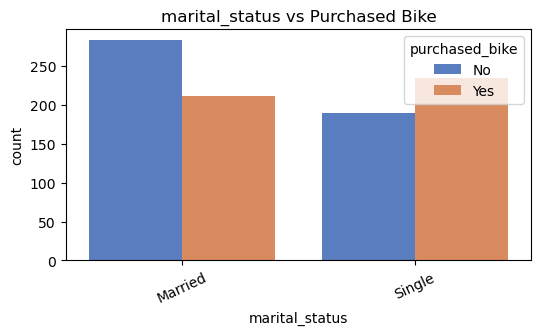

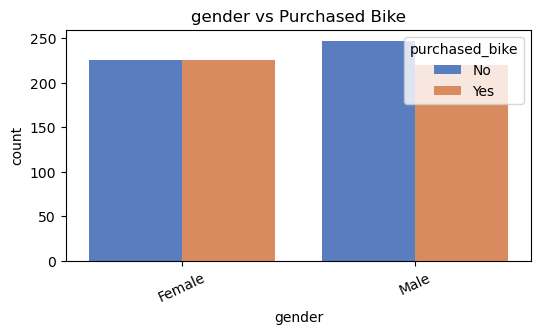

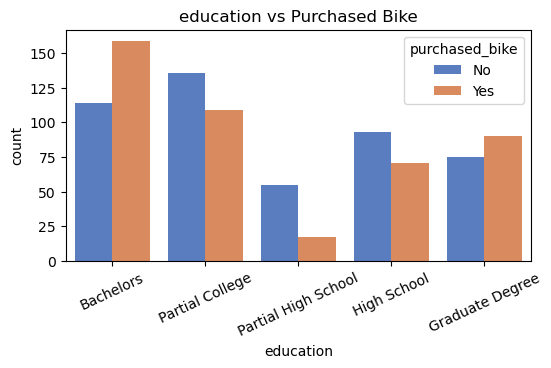

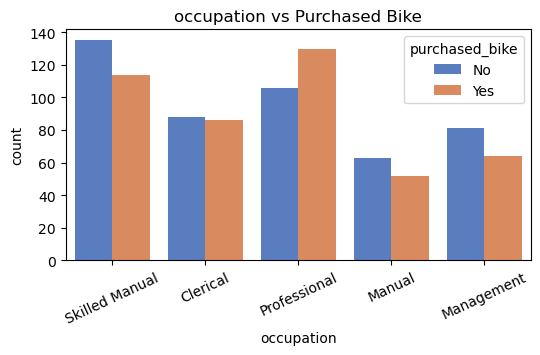

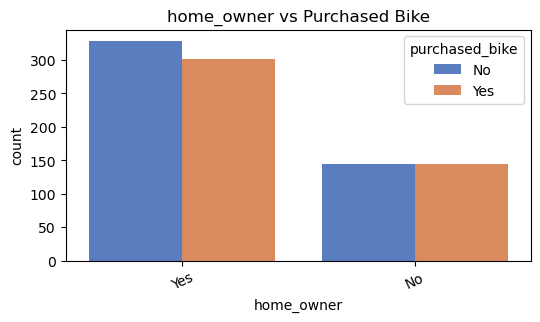

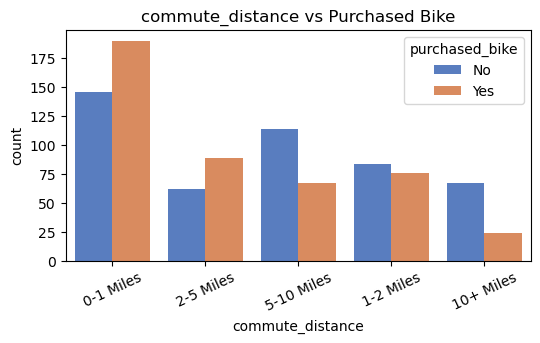

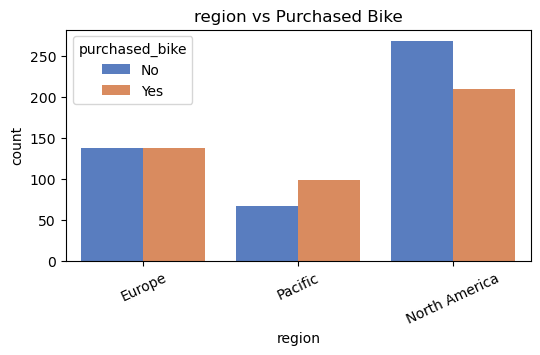

In [25]:
# Anova Categorical vs Target
for col in categorical_cols:
    if col != 'purchased_bike':
        plt.figure(figsize=(6,3))
        sns.countplot(data=df, x=col, hue='purchased_bike', palette='muted')
        plt.title(f'{col} vs Purchased Bike')
        plt.xticks(rotation=25)
        plt.show()

In [26]:
# Chi square test
from scipy.stats import chi2_contingency

for col in categorical_cols:
    if col != 'purchased_bike':
        contingency = pd.crosstab(df[col], df['purchased_bike'])
        chi2, p, dof, expected = chi2_contingency(contingency)
        print(f"{col} → p-value = {p:.4f}")
        if p < 0.05:
            print("Significant association with Purchased Bike \n")
        else:
            print("No significant association \n")


marital_status → p-value = 0.0002
Significant association with Purchased Bike 

gender → p-value = 0.4176
No significant association 

education → p-value = 0.0000
Significant association with Purchased Bike 

occupation → p-value = 0.1653
No significant association 

home_owner → p-value = 0.5462
No significant association 

commute_distance → p-value = 0.0000
Significant association with Purchased Bike 

region → p-value = 0.0018
Significant association with Purchased Bike 



Data Visualization

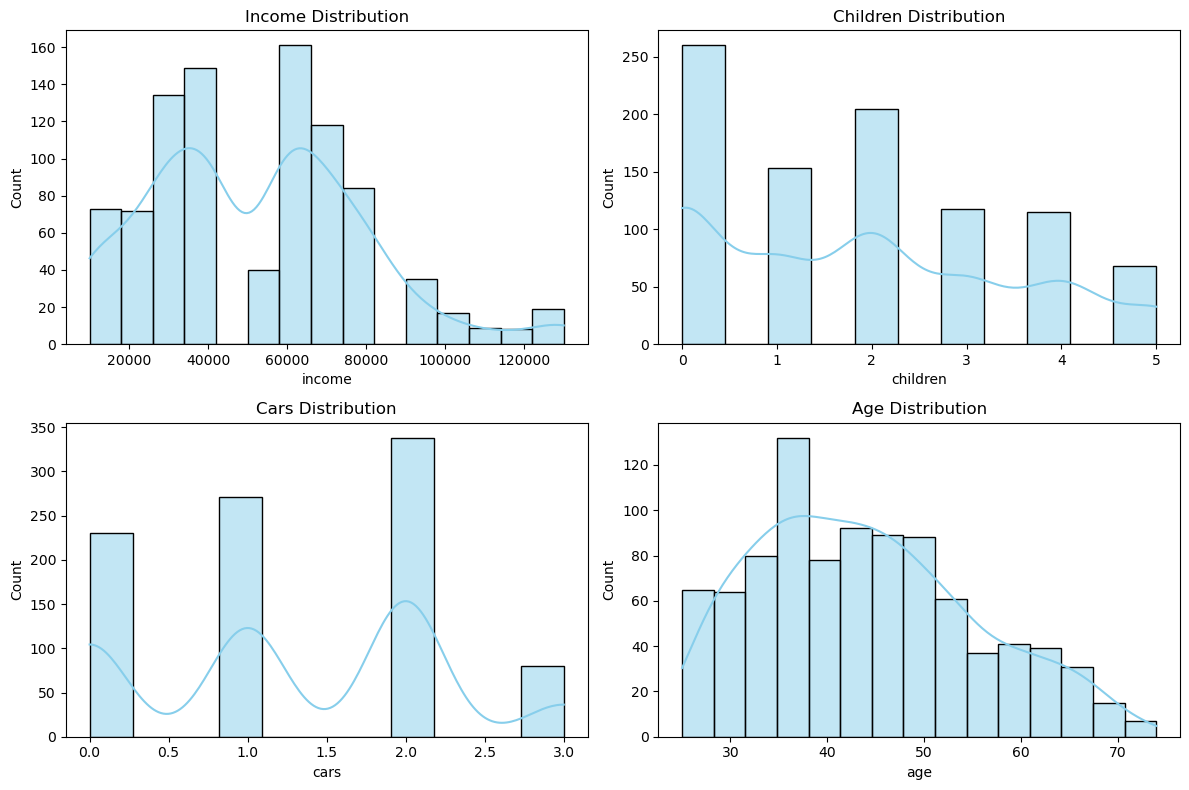

In [27]:
# Numeric feature distributions
numeric_cols = ['income', 'children', 'cars', 'age']

plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'{col.capitalize()} Distribution')
plt.tight_layout()
plt.show()

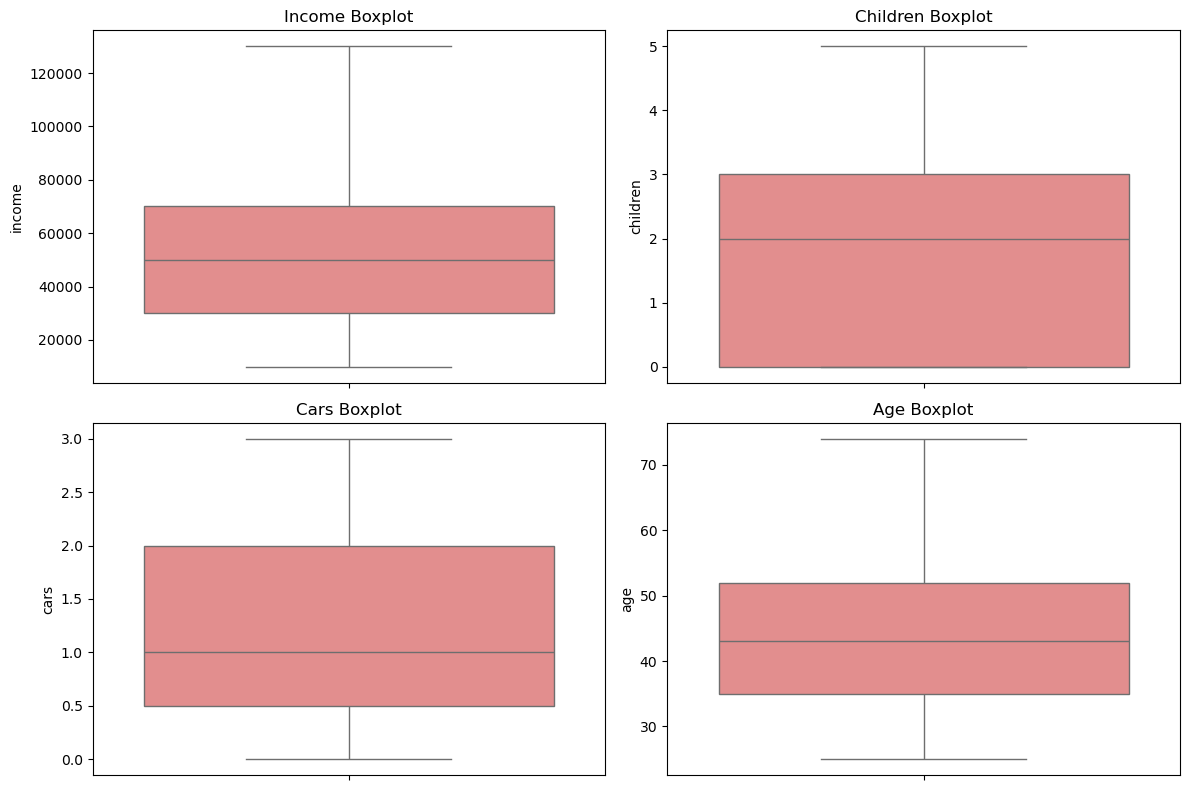

In [28]:
# Box plots
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, y=col, color='lightcoral')
    plt.title(f'{col.capitalize()} Boxplot')
plt.tight_layout()
plt.show()


C:\Users\Zarwan\AppData\Local\Temp\ipykernel_8428\91668507.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')
C:\Users\Zarwan\AppData\Local\Temp\ipykernel_8428\91668507.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')
C:\Users\Zarwan\AppData\Local\Temp\ipykernel_8428\91668507.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')
C:\Users\Zarwan\AppData\Local\Temp\ipykernel_8428\91668507.py:7: FutureWarning: 

Passing `palette` withou

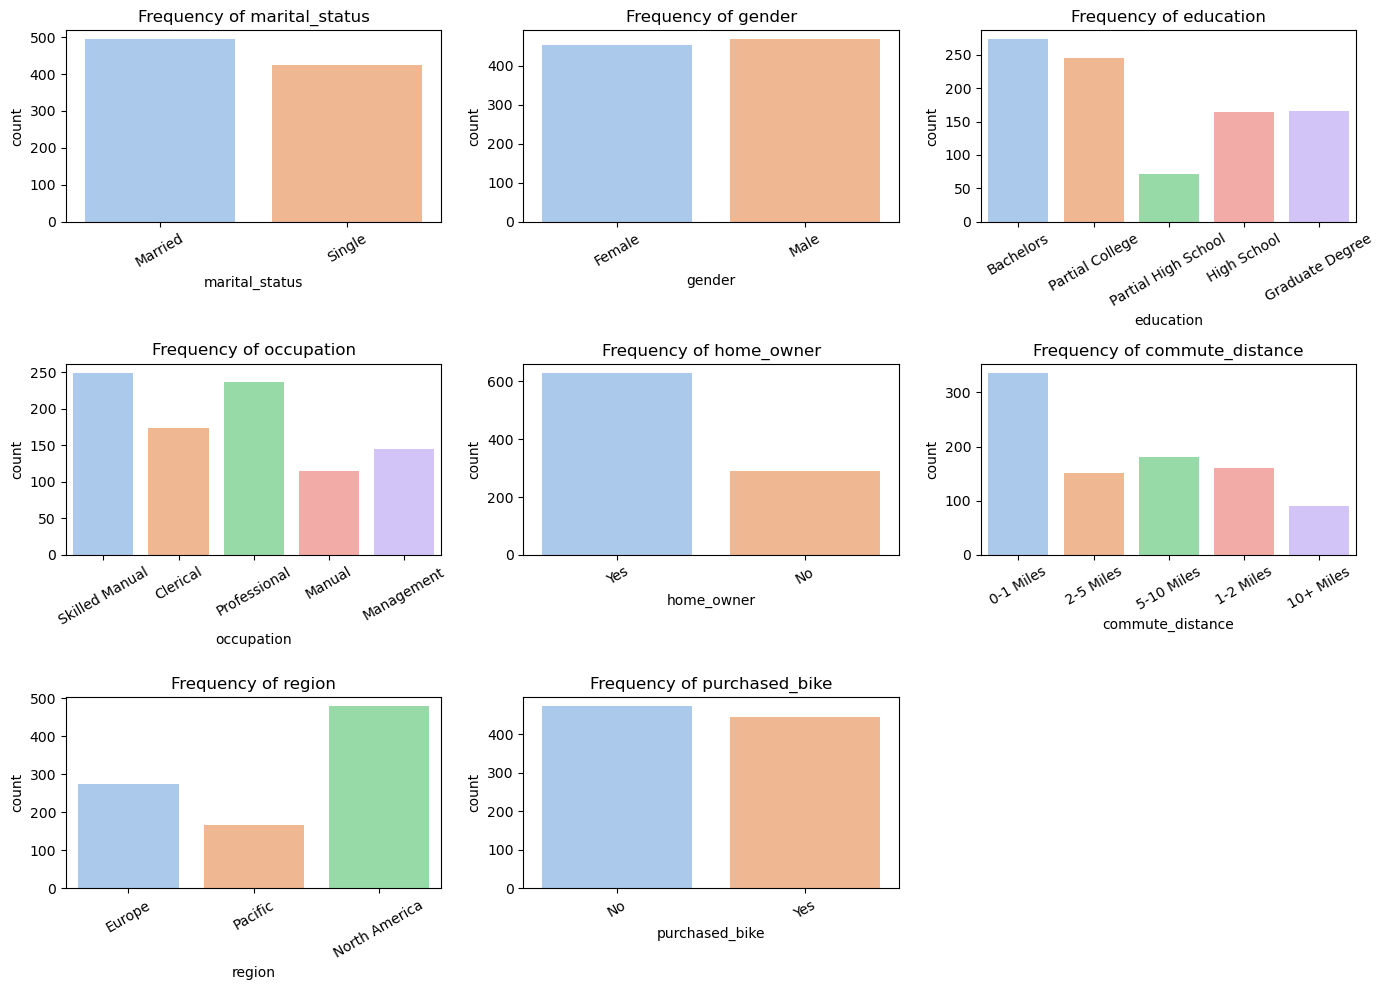

In [29]:
# Categorical feature frequencies
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

plt.figure(figsize=(14, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot((len(categorical_cols) + 2)//3, 3, i)
    sns.countplot(data=df, x=col, palette='pastel')
    plt.title(f'Frequency of {col}')
    plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


C:\Users\Zarwan\AppData\Local\Temp\ipykernel_8428\2709721654.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target, y=col, palette='Set2')


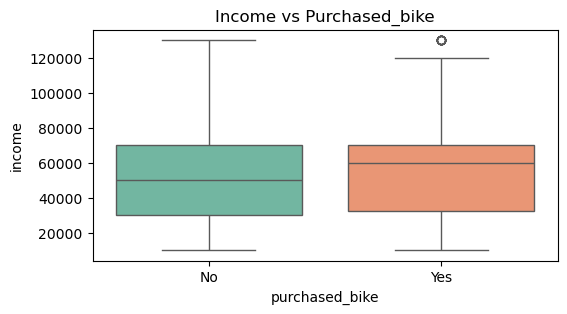

C:\Users\Zarwan\AppData\Local\Temp\ipykernel_8428\2709721654.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target, y=col, palette='Set2')


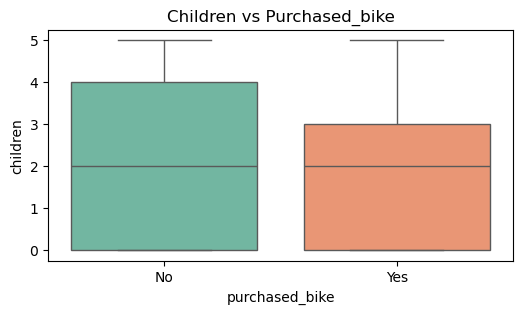

C:\Users\Zarwan\AppData\Local\Temp\ipykernel_8428\2709721654.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target, y=col, palette='Set2')


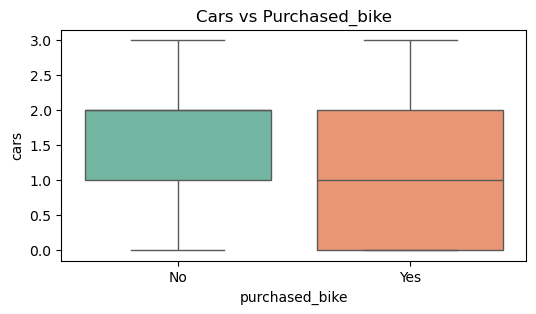

C:\Users\Zarwan\AppData\Local\Temp\ipykernel_8428\2709721654.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target, y=col, palette='Set2')


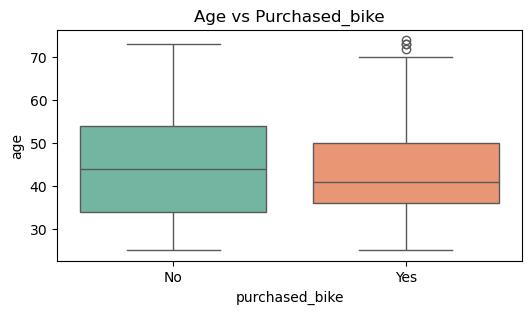

In [30]:
# Relationship between numeric features and target
target = 'purchased_bike'

for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(data=df, x=target, y=col, palette='Set2')
    plt.title(f'{col.capitalize()} vs {target.capitalize()}')
    plt.show()

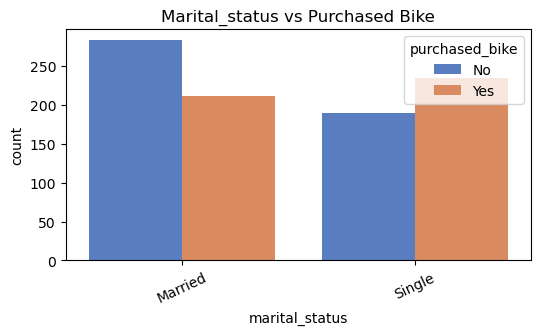

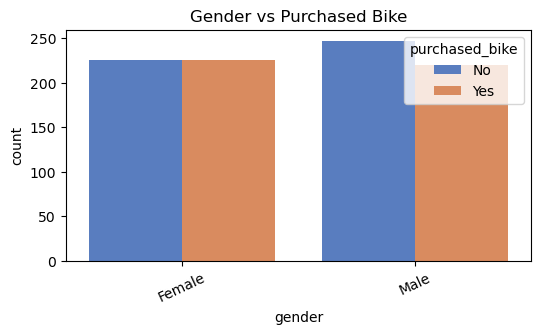

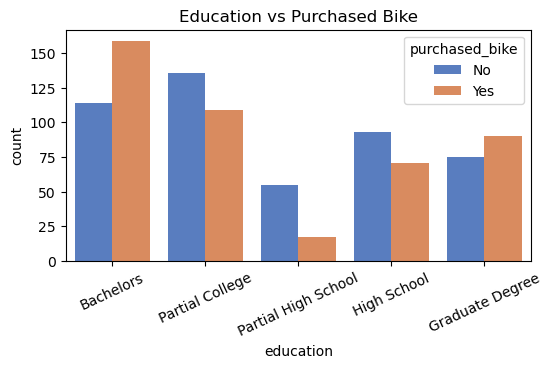

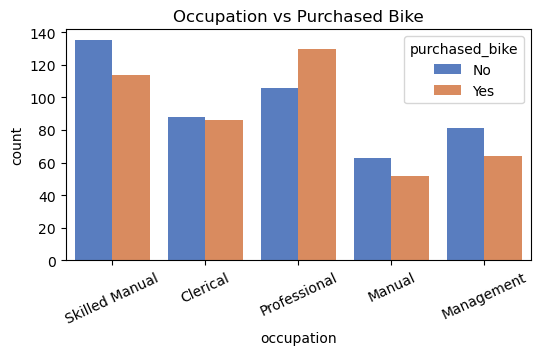

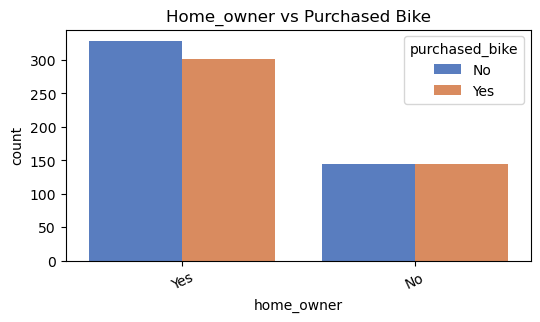

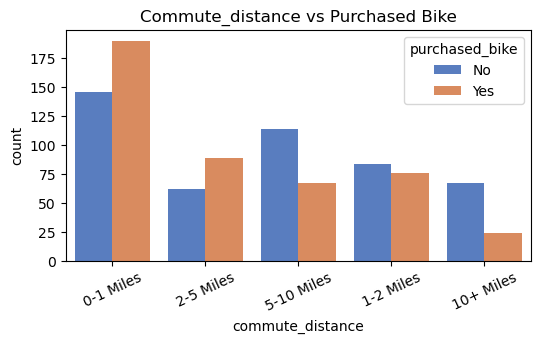

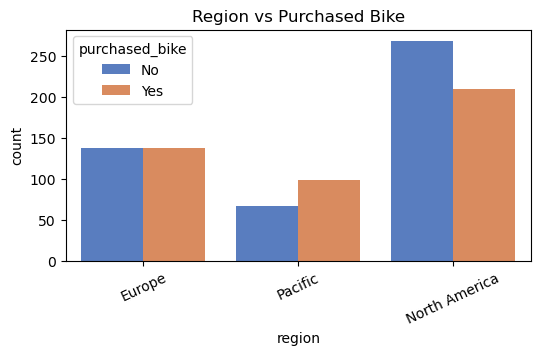

In [31]:
# Relationship between categorical features and target
for col in categorical_cols:
    if col != 'purchased_bike':
        plt.figure(figsize=(6, 3))
        sns.countplot(data=df, x=col, hue='purchased_bike', palette='muted')
        plt.title(f'{col.capitalize()} vs Purchased Bike')
        plt.xticks(rotation=25)
        plt.show()

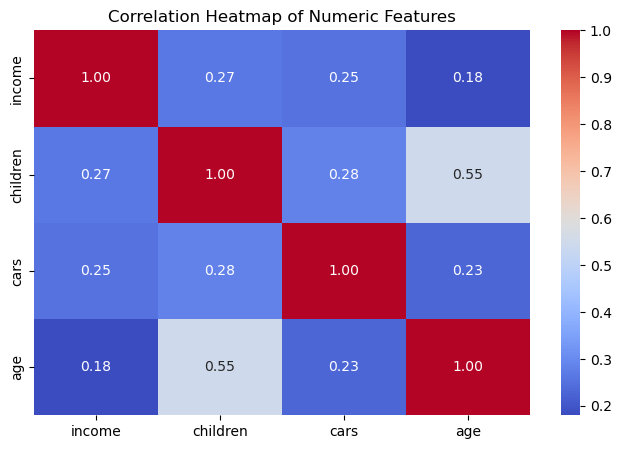

In [32]:
# Correlation heapmap
plt.figure(figsize=(8, 5))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

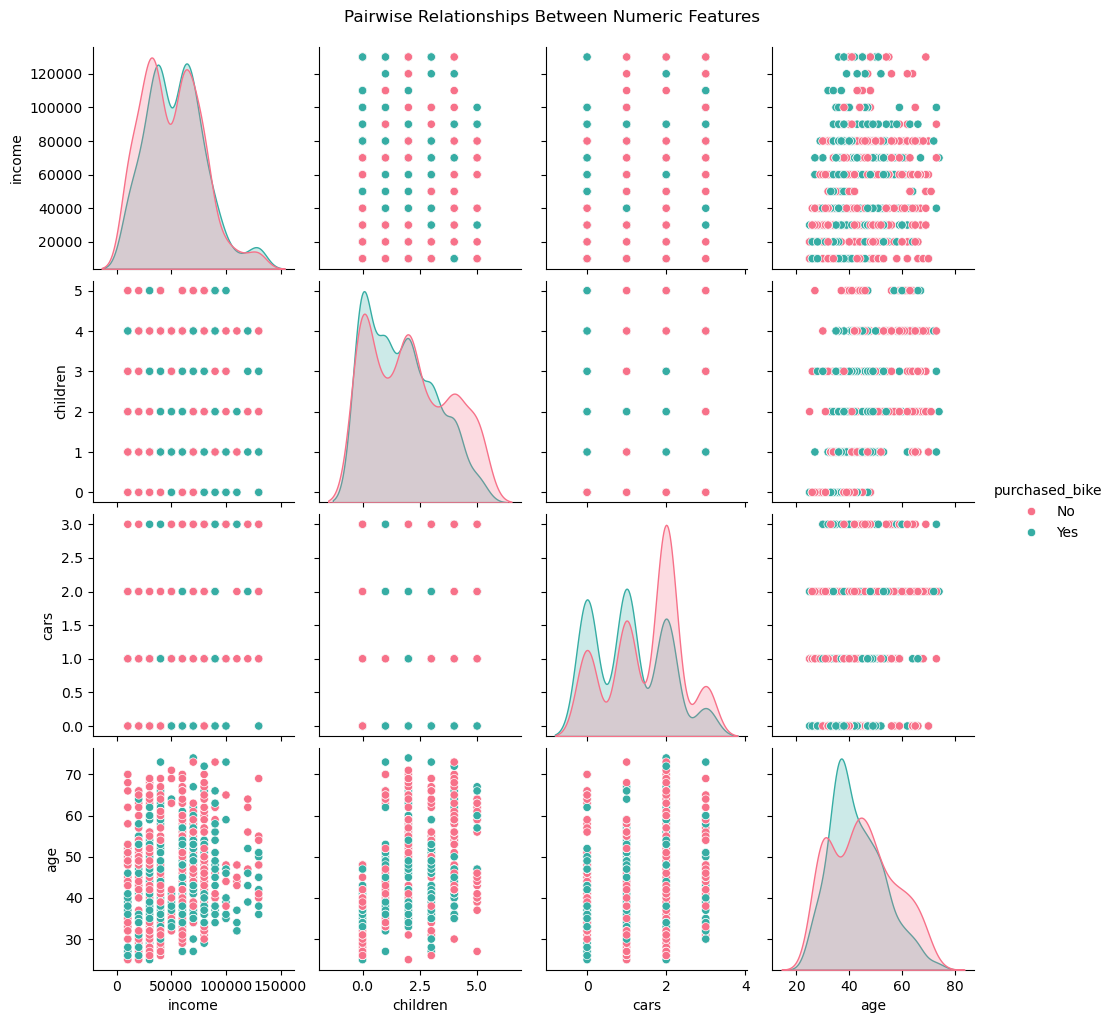

In [33]:
sns.pairplot(df, vars=numeric_cols, hue='purchased_bike', palette='husl')
plt.suptitle('Pairwise Relationships Between Numeric Features', y=1.02)
plt.show()

Classification

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [35]:
# Define features and target
target = 'purchased_bike'
x = df.drop(columns=[target])
y = df[target]

# Encode categorical features (if any)
x = pd.get_dummies(x, drop_first=True)

print("Feature Matrix Shape:", x.shape)
print("Target Shape:", y.shape)

Feature Matrix Shape: (919, 21)
Target Shape: (919,)


In [36]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

print("Training Set Shape:", x_train.shape)
print("Testing Set Shape:", x_test.shape)


Training Set Shape: (735, 21)
Testing Set Shape: (184, 21)


In [37]:
# Initialize Decision Tree
dt = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=4,
    random_state=42
)

# Train the model
dt.fit(x_train, y_train)

print("Decision tree model trained successfully")


Decision tree model trained successfully


Model Accuracy: 64.67%


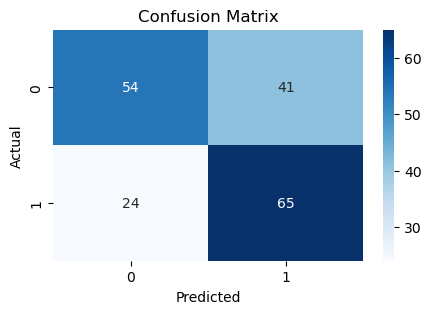


Classification Report:
              precision    recall  f1-score   support

          No       0.69      0.57      0.62        95
         Yes       0.61      0.73      0.67        89

    accuracy                           0.65       184
   macro avg       0.65      0.65      0.65       184
weighted avg       0.65      0.65      0.64       184



In [38]:
# Predictions
y_pred = dt.predict(x_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {acc*100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


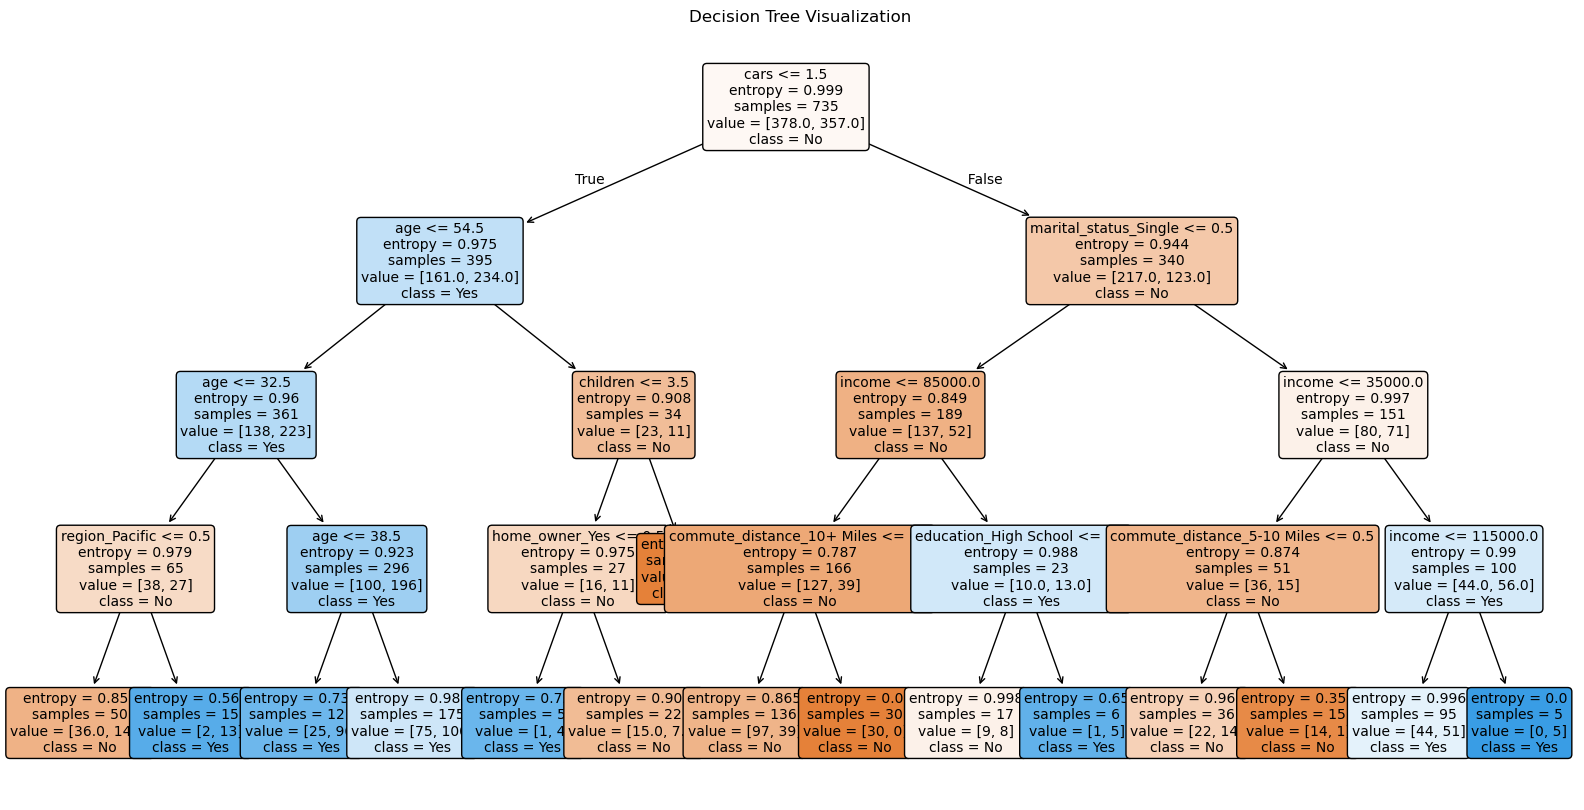

In [39]:
plt.figure(figsize=(20,10))
plot_tree(
    dt,
    filled=True,
    feature_names=x.columns,
    class_names=['No', 'Yes'],
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Visualization")
plt.show()


C:\Users\Zarwan\AppData\Local\Temp\ipykernel_8428\1682156670.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_importance.head(10), x='Importance', y='Feature', palette='viridis')


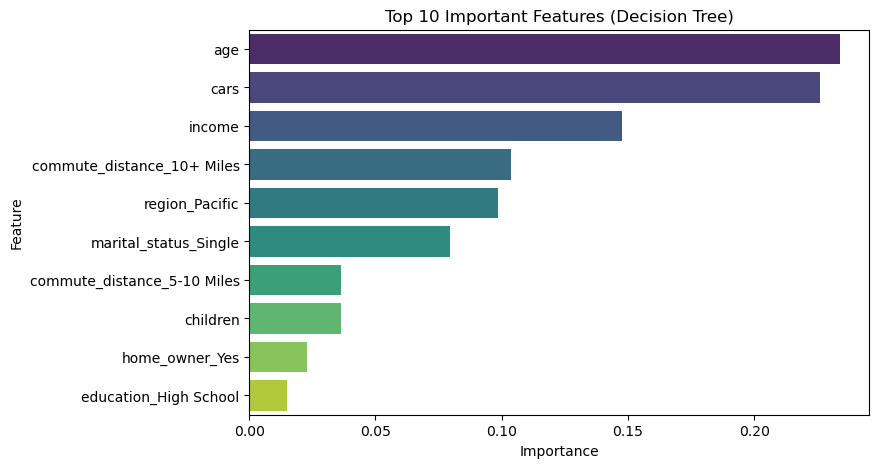

In [40]:
# Get feature importance
feat_importance = pd.DataFrame({
    'Feature': x.columns,
    'Importance': dt.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(data=feat_importance.head(10), x='Importance', y='Feature', palette='viridis')
plt.title("Top 10 Important Features (Decision Tree)")
plt.show()

Feature Scaling

In [41]:
from sklearn.preprocessing import StandardScaler

numeric_cols = ['income', 'age', 'children', 'cars']

scaler = StandardScaler()

# Fit on training data only
x_train[numeric_cols] = scaler.fit_transform(x_train[numeric_cols])

# Transform test data using same scaler
x_test[numeric_cols] = scaler.transform(x_test[numeric_cols])



Random Forest

In [42]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [43]:
# Random Forest Classifier
# n_estimators=100 means it creates 100 decision trees
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model using your existing training data
# Note: Using 'x_train' and 'y_train' as seen in your DSF_Project notebook
rf_model.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [44]:
# Make predictions on the test set
y_pred = rf_model.predict(x_test)

Accuracy Score: 0.6902173913043478
------------------------------
Confusion Matrix:


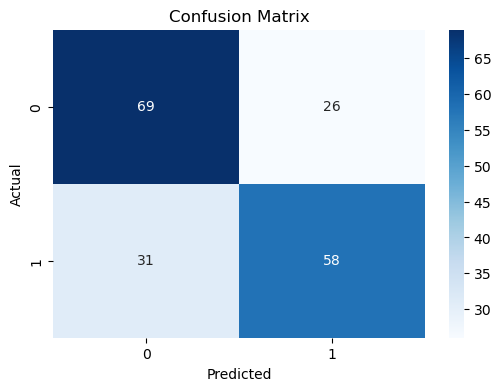

Classification Report:
              precision    recall  f1-score   support

          No       0.69      0.73      0.71        95
         Yes       0.69      0.65      0.67        89

    accuracy                           0.69       184
   macro avg       0.69      0.69      0.69       184
weighted avg       0.69      0.69      0.69       184



In [45]:
# Print Accuracy Score
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("-" * 30)

# Plot Confusion Matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print Classification Report (Precision, Recall, F1-Score)
print("Classification Report:")
print(classification_report(y_test, y_pred))

KNN

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
# 1. Create the KNN Classifier
# n_neighbors=5 is the standard default. You can try 3, 5, 7, etc.
knn_model = KNeighborsClassifier(n_neighbors=5)

# 2. Train the model using your existing training data
# Note: Ensure x_train is scaled (StandardScaler) for KNN to work best
knn_model.fit(x_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [48]:
# Make predictions on the test set
y_pred = knn_model.predict(x_test)

Accuracy Score: 0.6467391304347826
------------------------------
Confusion Matrix:


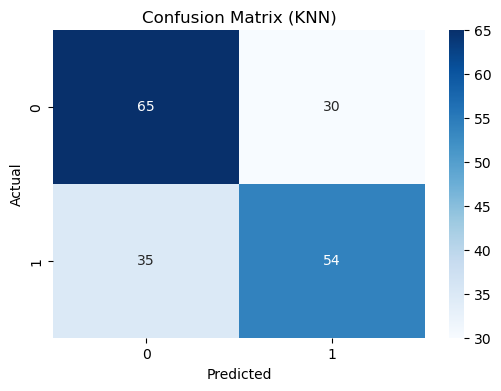

Classification Report:
              precision    recall  f1-score   support

          No       0.65      0.68      0.67        95
         Yes       0.64      0.61      0.62        89

    accuracy                           0.65       184
   macro avg       0.65      0.65      0.65       184
weighted avg       0.65      0.65      0.65       184



In [49]:
# 1. Print Accuracy Score
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("-" * 30)

# 2. Plot Confusion Matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (KNN)')
plt.show()

# 3. Print Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

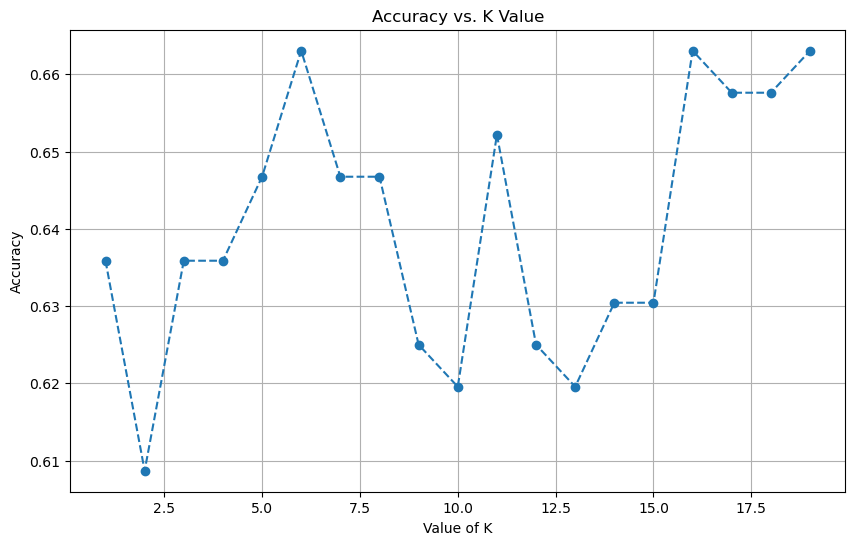

In [50]:
# Test different K values to see which gives the best accuracy
scores = []
k_range = range(1, 20)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred_k = knn.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred_k))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_range, scores, marker='o', linestyle='--')
plt.xlabel('Value of K')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. K Value')
plt.grid(True)
plt.show()

MLP

In [53]:
from sklearn.neural_network import MLPClassifier

In [54]:
# 2. Create the Neural Network
# hidden_layer_sizes=(100,): One layer with 100 neurons (standard)
# max_iter=1000: Allows it to run longer to find the best pattern
# activation='relu': The standard way neurons "fire"
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), 
                          max_iter=1000, 
                          activation='relu', 
                          solver='adam', 
                          random_state=42)

In [55]:
# 3. Train the model (using your existing data)
mlp_model.fit(x_train, y_train)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


,hidden_layer_sizes,"(100,)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,1000
,shuffle,True
,random_state,42


In [56]:
# 4. Make Predictions
y_pred = mlp_model.predict(x_test)

In [57]:
# 5. Evaluate
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("-" * 30)

Accuracy Score: 0.6630434782608695
------------------------------


Confusion Matrix:


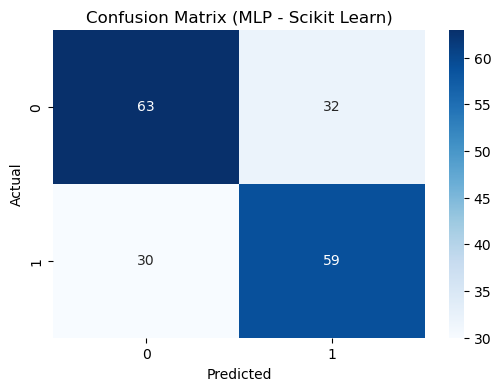

In [58]:
# Confusion Matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (MLP - Scikit Learn)')
plt.show()

In [59]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

          No       0.68      0.66      0.67        95
         Yes       0.65      0.66      0.66        89

    accuracy                           0.66       184
   macro avg       0.66      0.66      0.66       184
weighted avg       0.66      0.66      0.66       184



Cross Validation

In [73]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

In [62]:
# Create a dictionary of models
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "MLP (Neural Net)": MLPClassifier(max_iter=1000)
}

In [67]:
# Define number of folds
k_folds = 5

# Store results for plotting
results = {}

print(f"{'Model':<20} | {'Mean Accuracy':<15} | {'Std Deviation':<15}")
print("-" * 60)

for name, model in models.items():
    # Perform k-fold cross-validation
    # We use x_train and y_train here because 'X' was not defined
    scores = cross_val_score(model, x_train, y_train, cv=k_folds, scoring='accuracy')
    
    # Save scores
    results[name] = scores
    
    # Print the average accuracy and standard deviation (stability)
    print(f"{name:<20} | {scores.mean():.4f}          | {scores.std():.4f}")

Model                | Mean Accuracy   | Std Deviation  
------------------------------------------------------------
Decision Tree        | 0.6327          | 0.0295
Random Forest        | 0.6857          | 0.0179
KNN                  | 0.6531          | 0.0129


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP (Neural Net)     | 0.6735          | 0.0258


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


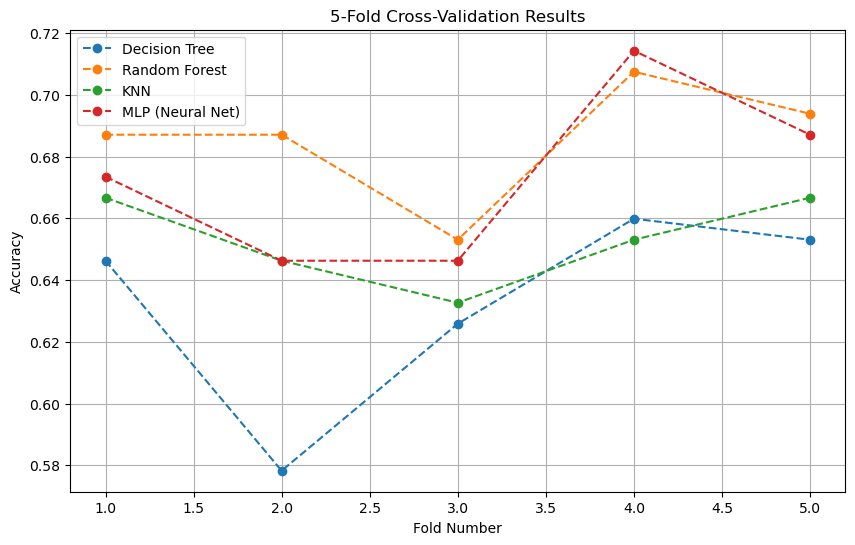

In [68]:
# Plot the results
plt.figure(figsize=(10, 6))

# Plot each model's performance across the 5 folds
for name, scores in results.items():
    plt.plot(range(1, k_folds + 1), scores, marker='o', linestyle='dashed', label=name)

plt.title(f'{k_folds}-Fold Cross-Validation Results')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\Zarwan\AppData\Local\Temp\ipykernel_8428\1649952182.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(results.values(), labels=results.keys())


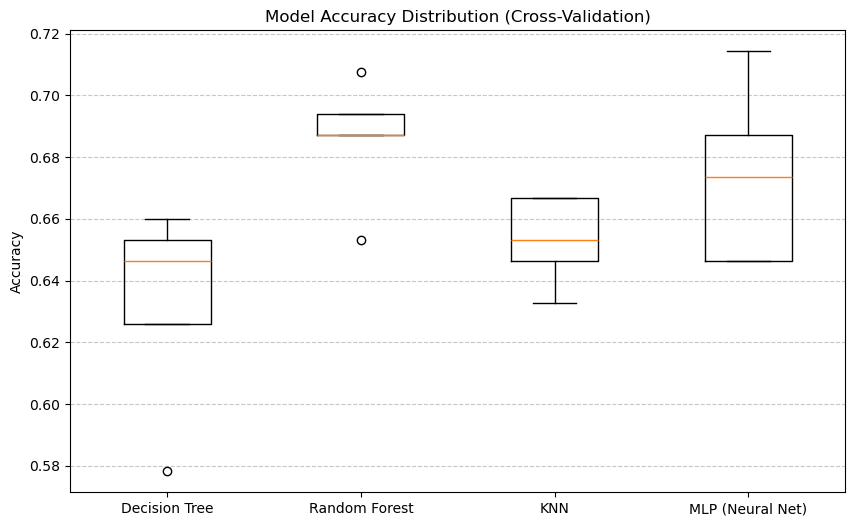

In [69]:
plt.figure(figsize=(10, 6))
plt.boxplot(results.values(), labels=results.keys())
plt.title('Model Accuracy Distribution (Cross-Validation)')
plt.ylabel('Accuracy')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [75]:
# Import necessary libraries
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

# --- THE FIX: Convert "Yes"/"No" to 1/0 ---
# The error happened because 'recall' needs numbers, not text.
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

# Check to ensure it worked (Optional print)
print("Classes found:", le.classes_)

Classes found: ['No' 'Yes']


In [76]:
# Create a dictionary of models
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "MLP (Neural Net)": MLPClassifier(max_iter=1000)
}

In [77]:
# Define number of folds
k_folds = 5

# Store results for plotting
results = {}

print(f"{'Model':<20} | {'Mean Recall':<15} | {'Std Deviation':<15}")
print("-" * 60)

for name, model in models.items():
    # Perform k-fold cross-validation
    # 1. We use y_train_encoded (Fixed Target)
    # 2. scoring='recall' (Focus on finding buyers)
    scores = cross_val_score(model, x_train, y_train_encoded, cv=k_folds, scoring='recall')
    
    # Save scores
    results[name] = scores
    
    # Print the average Recall and standard deviation
    print(f"{name:<20} | {scores.mean():.4f}          | {scores.std():.4f}")

Model                | Mean Recall     | Std Deviation  
------------------------------------------------------------
Decision Tree        | 0.6442          | 0.0261
Random Forest        | 0.6749          | 0.0582
KNN                  | 0.6384          | 0.0708


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP (Neural Net)     | 0.6695          | 0.0666


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


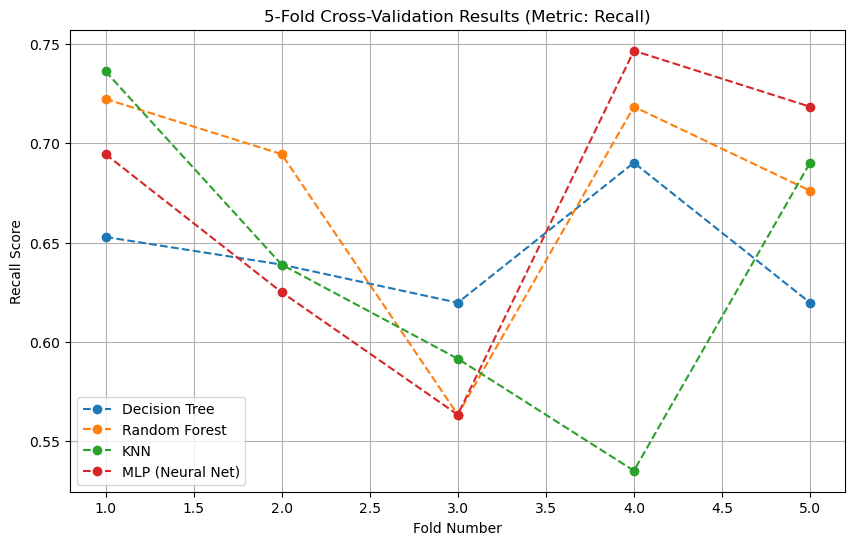

In [78]:
# Plot the results
plt.figure(figsize=(10, 6))

# Plot each model's Recall performance across the 5 folds
for name, scores in results.items():
    plt.plot(range(1, k_folds + 1), scores, marker='o', linestyle='dashed', label=name)

plt.title(f'{k_folds}-Fold Cross-Validation Results (Metric: Recall)')
plt.xlabel('Fold Number')
plt.ylabel('Recall Score')
plt.legend()
plt.grid(True)
plt.show()

In [79]:
# Define number of folds
k_folds = 5

# Store results for plotting
results = {}

print(f"{'Model':<20} | {'Mean Precision':<15} | {'Std Deviation':<15}")
print("-" * 60)

for name, model in models.items():
    # Perform k-fold cross-validation
    # scoring='precision' focuses on correctness of Positive predictions
    scores = cross_val_score(model, x_train, y_train_encoded, cv=k_folds, scoring='precision')
    
    # Save scores
    results[name] = scores
    
    # Print the average Precision and standard deviation
    print(f"{name:<20} | {scores.mean():.4f}          | {scores.std():.4f}")

Model                | Mean Precision  | Std Deviation  
------------------------------------------------------------
Decision Tree        | 0.6371          | 0.0288
Random Forest        | 0.6692          | 0.0288
KNN                  | 0.6455          | 0.0175


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP (Neural Net)     | 0.6679          | 0.0218


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


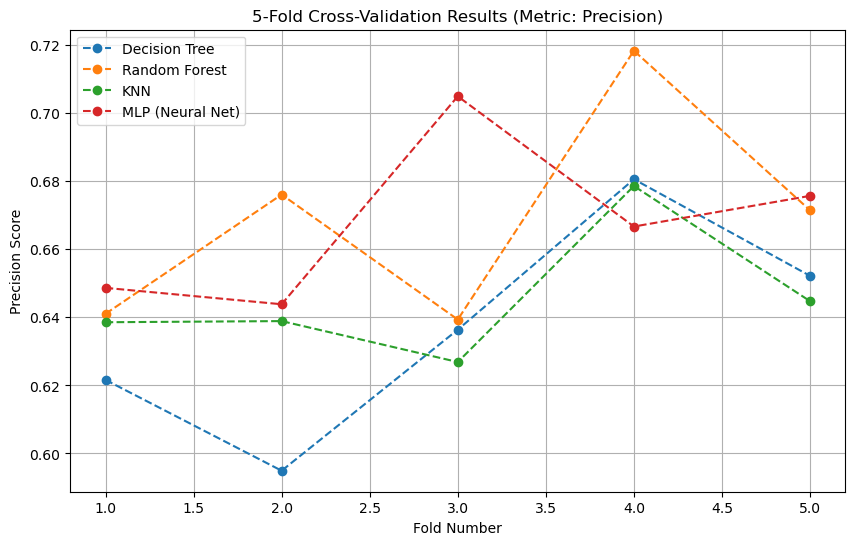

In [80]:
# Plot the results
plt.figure(figsize=(10, 6))

# Plot each model's Precision performance across the 5 folds
for name, scores in results.items():
    plt.plot(range(1, k_folds + 1), scores, marker='o', linestyle='dashed', label=name)

plt.title(f'{k_folds}-Fold Cross-Validation Results (Metric: Precision)')
plt.xlabel('Fold Number')
plt.ylabel('Precision Score')
plt.legend()
plt.grid(True)
plt.show()

In [81]:
# Define number of folds
k_folds = 5

# Store results for plotting
results = {}

print(f"{'Model':<20} | {'Mean F1 Score':<15} | {'Std Deviation':<15}")
print("-" * 60)

for name, model in models.items():
    # Perform k-fold cross-validation
    # scoring='f1' calculates the harmonic mean of Precision and Recall
    scores = cross_val_score(model, x_train, y_train_encoded, cv=k_folds, scoring='f1')
    
    # Save scores
    results[name] = scores
    
    # Print the average F1 Score and standard deviation
    print(f"{name:<20} | {scores.mean():.4f}          | {scores.std():.4f}")

Model                | Mean F1 Score   | Std Deviation  
------------------------------------------------------------
Decision Tree        | 0.6324          | 0.0274
Random Forest        | 0.6722          | 0.0341
KNN                  | 0.6393          | 0.0327


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP (Neural Net)     | 0.6670          | 0.0425


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


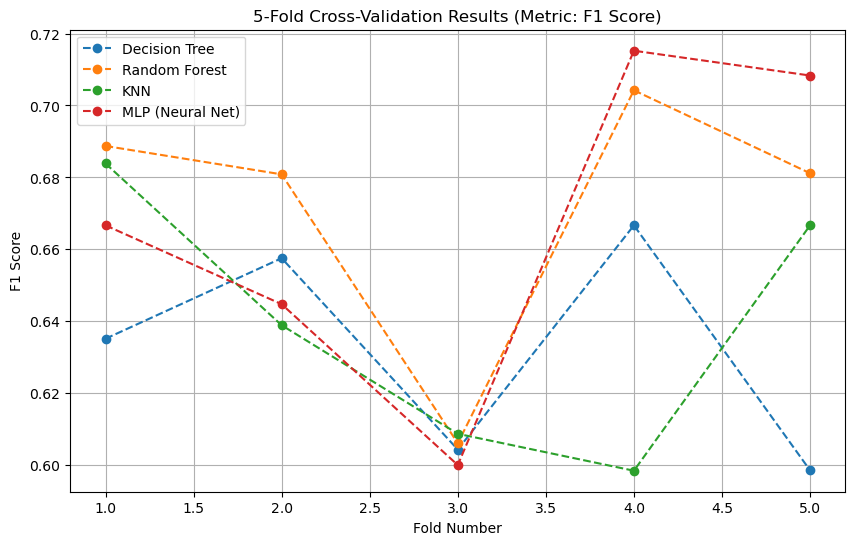

In [82]:
# Plot the results
plt.figure(figsize=(10, 6))

# Plot each model's F1 performance across the 5 folds
for name, scores in results.items():
    plt.plot(range(1, k_folds + 1), scores, marker='o', linestyle='dashed', label=name)

plt.title(f'{k_folds}-Fold Cross-Validation Results (Metric: F1 Score)')
plt.xlabel('Fold Number')
plt.ylabel('F1 Score')
plt.legend()
plt.grid(True)
plt.show()

Final Comparison

In [87]:
# Import necessary libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Encode y_test (Target) to 0 and 1 for metric calculation
# This prevents the "pos_label" error
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)

# Also ensure y_train is encoded for training
y_train_encoded = le.fit_transform(y_train)

In [88]:
# Initialize a list to hold the final results
model_results = []

# Loop through each model in your dictionary
for name, model in models.items():
    # 1. Train the model on the training data
    model.fit(x_train, y_train_encoded)
    
    # 2. Make predictions on the test set
    y_pred = model.predict(x_test)
    
    # 3. Calculate all Metrics
    acc = accuracy_score(y_test_encoded, y_pred)
    prec = precision_score(y_test_encoded, y_pred)
    rec = recall_score(y_test_encoded, y_pred)
    f1 = f1_score(y_test_encoded, y_pred)
    
    # 4. Append the results to our list
    model_results.append({
        "Model": name,
        "Accuracy": acc,
        "F1 Score": f1,
        "Precision": prec,
        "Recall": rec
    })

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [89]:
# Create DataFrame from the results list
final_table = pd.DataFrame(model_results)

# Set the 'Model' column as the index (row labels)
final_table.set_index("Model", inplace=True)

# Sort by 'F1 Score' in descending order (Highest first)
final_table = final_table.sort_values(by="F1 Score", ascending=False)

# Display the final table
print("-" * 50)
print("FINAL MODEL COMPARISON TABLE")
print("-" * 50)
display(final_table)

--------------------------------------------------
FINAL MODEL COMPARISON TABLE
--------------------------------------------------


,Accuracy,F1 Score,Precision,Recall
Model,,,,
Random Forest,0.701087,0.674556,0.712500,0.640449
Decision Tree,0.668478,0.647399,0.666667,0.629213
MLP (Neural Net),0.657609,0.644068,0.647727,0.640449
KNN,0.646739,0.624277,0.642857,0.606742


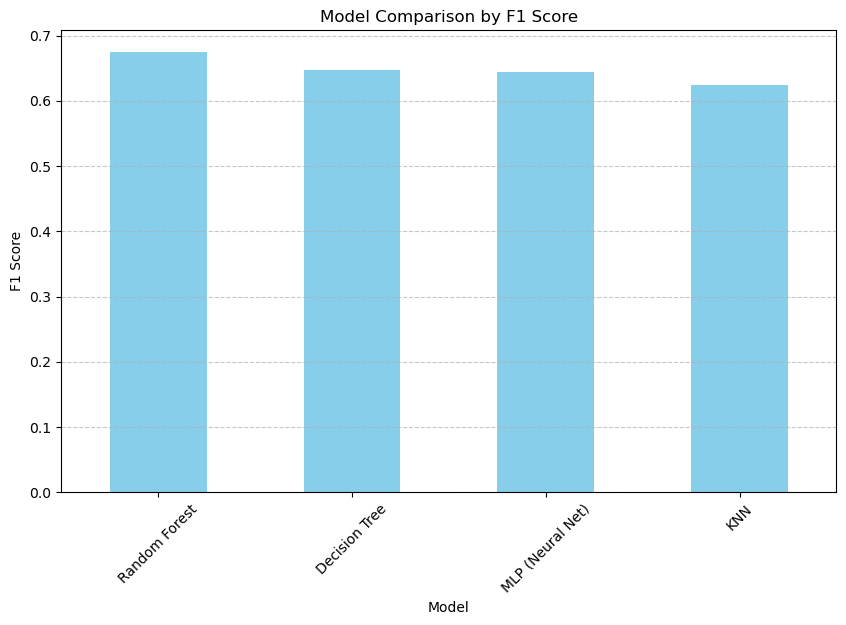

In [90]:
import matplotlib.pyplot as plt

# Plot the F1 Scores for visual comparison
final_table['F1 Score'].plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Model Comparison by F1 Score')
plt.ylabel('F1 Score')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()